In [1]:
import sys
import os
from os import pardir, getcwd
from os.path import join, abspath
PARENT_DIRECTORY = abspath(join(getcwd(), pardir))
sys.path.insert(0, PARENT_DIRECTORY)

import warnings
import sklearn.exceptions
import talos as ta
warnings.filterwarnings("ignore", category=sklearn.exceptions.UndefinedMetricWarning)
warnings.simplefilter(action='ignore', category=FutureWarning)


from definitions import TALOS_DIR
from app.preprocessing import load_dataset,preprocess_data
from app.models import load_model


Using TensorFlow backend.


In [2]:
data = load_dataset(load_from_pickle=True, input_ins='as_tf_idf')
Classes = list(data['tags'].value_counts().index)
Nclasses = len(Classes)
print(data['tags'].value_counts())

sql              2000
ruby-on-rails    2000
android          2000
angularjs        2000
asp.net          2000
c                2000
c#               2000
c++              2000
css              2000
html             2000
ios              2000
iphone           2000
java             2000
javascript       2000
jquery           2000
mysql            2000
objective-c      2000
php              2000
python           2000
.net             2000
Name: tags, dtype: int64


In [3]:
# 70% Train & 10% HeldOut & 20% Test
model_data_tf = preprocess_data(data, 'tags', 'post',
                                input_ins='as_tf_idf',
                                cv_split_full=0.2,
                                cv_split_dev=0.125)


In [4]:
'''Use the test filename if ypu don't want to delete
    # your current logs from the previous run.'''
TALOS_TF_LOG_FILENAME = 'talos_tf_log_test'
talos_tf_log_pathname = os.path.join(TALOS_DIR, TALOS_TF_LOG_FILENAME)

###### Production configuration
tf_idf_model_config = {
    'visualize_process': [False],
    'first_neuron': [64, 128],  # First Layer
    'activation': ['relu', 'tanh'],
    'dropout': [0.2, 0.6],
    'number_of_hidden_layers': [0, 1, 2],
    'shapes':['funnel'],
    'early_stopping':[True],
    'early_stopping_config__monitor': ['val_f1'],
    'early_stopping_config__min_delta': [0],
    'early_stopping_config__patience': [5],
    'early_stopping_config__mode': ['max'],
    'epochs': [4,5,7],
    'batch_size': [32, 64],
    'model_type': ['keras_tf_idf_model'],
}

history_model_tf_idf = ta.Scan(model_data_tf['x_train'],
                               model_data_tf['y_train'],
                               x_val=model_data_tf['x_train_dev'],
                               y_val=model_data_tf['y_train_dev'],
                               model=load_model,
                               params=tf_idf_model_config,
                               grid_downsample=0.05,
                               print_params=True,
                               seed=123,
                               last_epoch_value=True,
                               dataset_name=talos_tf_log_pathname
                               )

  0%|          | 0/7 [00:00<?, ?it/s]

{'visualize_process': False, 'first_neuron': 64, 'activation': 'relu', 'dropout': 0.2, 'number_of_hidden_layers': 0, 'shapes': 'funnel', 'early_stopping': True, 'early_stopping_config__monitor': 'val_f1', 'early_stopping_config__min_delta': 0, 'early_stopping_config__patience': 5, 'early_stopping_config__mode': 'max', 'epochs': 7, 'batch_size': 64, 'model_type': 'keras_tf_idf_model'}
Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.


 14%|█▍        | 1/7 [00:17<01:42, 17.14s/it]

{'visualize_process': False, 'first_neuron': 128, 'activation': 'relu', 'dropout': 0.2, 'number_of_hidden_layers': 0, 'shapes': 'funnel', 'early_stopping': True, 'early_stopping_config__monitor': 'val_f1', 'early_stopping_config__min_delta': 0, 'early_stopping_config__patience': 5, 'early_stopping_config__mode': 'max', 'epochs': 7, 'batch_size': 32, 'model_type': 'keras_tf_idf_model'}


 29%|██▊       | 2/7 [01:05<02:13, 26.65s/it]

{'visualize_process': False, 'first_neuron': 64, 'activation': 'tanh', 'dropout': 0.6, 'number_of_hidden_layers': 1, 'shapes': 'funnel', 'early_stopping': True, 'early_stopping_config__monitor': 'val_f1', 'early_stopping_config__min_delta': 0, 'early_stopping_config__patience': 5, 'early_stopping_config__mode': 'max', 'epochs': 4, 'batch_size': 64, 'model_type': 'keras_tf_idf_model'}


 43%|████▎     | 3/7 [01:18<01:29, 22.27s/it]

{'visualize_process': False, 'first_neuron': 128, 'activation': 'tanh', 'dropout': 0.2, 'number_of_hidden_layers': 1, 'shapes': 'funnel', 'early_stopping': True, 'early_stopping_config__monitor': 'val_f1', 'early_stopping_config__min_delta': 0, 'early_stopping_config__patience': 5, 'early_stopping_config__mode': 'max', 'epochs': 4, 'batch_size': 32, 'model_type': 'keras_tf_idf_model'}


 57%|█████▋    | 4/7 [01:48<01:14, 24.68s/it]

{'visualize_process': False, 'first_neuron': 128, 'activation': 'tanh', 'dropout': 0.6, 'number_of_hidden_layers': 0, 'shapes': 'funnel', 'early_stopping': True, 'early_stopping_config__monitor': 'val_f1', 'early_stopping_config__min_delta': 0, 'early_stopping_config__patience': 5, 'early_stopping_config__mode': 'max', 'epochs': 4, 'batch_size': 32, 'model_type': 'keras_tf_idf_model'}


 71%|███████▏  | 5/7 [02:21<00:54, 27.14s/it]

{'visualize_process': False, 'first_neuron': 64, 'activation': 'tanh', 'dropout': 0.6, 'number_of_hidden_layers': 0, 'shapes': 'funnel', 'early_stopping': True, 'early_stopping_config__monitor': 'val_f1', 'early_stopping_config__min_delta': 0, 'early_stopping_config__patience': 5, 'early_stopping_config__mode': 'max', 'epochs': 7, 'batch_size': 64, 'model_type': 'keras_tf_idf_model'}


 86%|████████▌ | 6/7 [02:44<00:25, 25.93s/it]

{'visualize_process': False, 'first_neuron': 64, 'activation': 'relu', 'dropout': 0.2, 'number_of_hidden_layers': 2, 'shapes': 'funnel', 'early_stopping': True, 'early_stopping_config__monitor': 'val_f1', 'early_stopping_config__min_delta': 0, 'early_stopping_config__patience': 5, 'early_stopping_config__mode': 'max', 'epochs': 5, 'batch_size': 64, 'model_type': 'keras_tf_idf_model'}


100%|██████████| 7/7 [03:13<00:00, 27.01s/it]


In [5]:
report_tf = ta.Reporting(history_model_tf_idf)
best_model_idx = report_tf.data['val_f1'].idxmax()
best_model_params = report_tf.data.loc[best_model_idx].to_dict()
best_model_params

{'round_epochs': 7,
 'val_loss': 0.5423433618545532,
 'val_f1': 0.8295276832580566,
 'val_categorical_accuracy': 0.8285,
 'loss': 0.3814127253804888,
 'f1': 0.8776112897055489,
 'categorical_accuracy': 0.8926071428571428,
 'visualize_process': 'False',
 'first_neuron': 64,
 'activation': 'tanh',
 'dropout': 0.6,
 'number_of_hidden_layers': 0,
 'shapes': 'funnel',
 'early_stopping': 'True',
 'early_stopping_config__monitor': 'val_f1',
 'early_stopping_config__min_delta': 0,
 'early_stopping_config__patience': 5,
 'early_stopping_config__mode': 'max',
 'epochs': 7,
 'batch_size': 64,
 'model_type': 'keras_tf_idf_model'}

In [7]:
model_tf_history, model_tf = load_model(model_data_tf['x_train'],
                                        model_data_tf['y_train'],
                                        model_data_tf['x_train_dev'],
                                        model_data_tf['y_train_dev'],
                                        best_model_params)

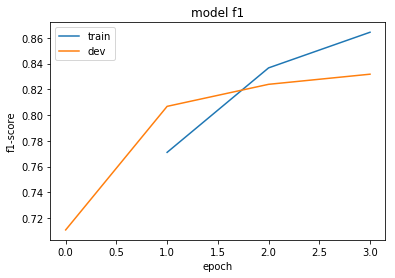

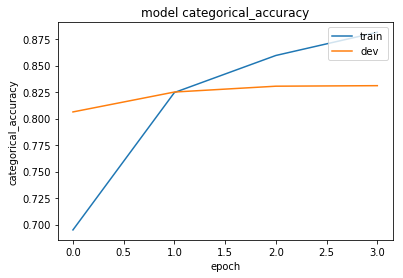

In [8]:
from app.visualization import plot_history_metrics
import matplotlib.pylab as plt

%matplotlib inline
plot_history_metrics(history_obj=model_tf_history)

## Without Early stopping

In [4]:
'''Use the test filename if ypu don't want to delete
    # your current logs from the previous run.'''
TALOS_TF_LOG_FILENAME = 'talos_tf_log_test'
talos_tf_log_pathname = os.path.join(TALOS_DIR, TALOS_TF_LOG_FILENAME)

###### Production configuration
tf_idf_model_config = {
    'visualize_process': [False],
    'first_neuron': [64, 128],  # First Layer
    'activation': ['relu', 'tanh'],
    'dropout': [0.2, 0.6],
    'number_of_hidden_layers': [0, 1, 2],
    'shapes':['funnel'],
    'early_stopping':[True],
    'early_stopping_config': [{
        'min_delta': 0,
        'patience': 3,
        'mode': 'max'
    }],
    'epochs': [20,30],
    'batch_size': [32, 64],
    'model_type': ['keras_tf_idf_model'],
}

history_model_tf_idf = ta.Scan(model_data_tf['x_train'],
                               model_data_tf['y_train'],
                               x_val=model_data_tf['x_train_dev'],
                               y_val=model_data_tf['y_train_dev'],
                               model=load_model,
                               params=tf_idf_model_config,
                               grid_downsample=0.05,
                               print_params=True,
                               seed=321,
                               last_epoch_value=True,
                               dataset_name=talos_tf_log_pathname
                               )

  0%|          | 0/4 [00:00<?, ?it/s]

{'visualize_process': False, 'first_neuron': 64, 'activation': 'tanh', 'dropout': 0.2, 'number_of_hidden_layers': 2, 'shapes': 'funnel', 'early_stopping': True, 'early_stopping_config': {'min_delta': 0, 'patience': 3, 'mode': 'max'}, 'epochs': 20, 'batch_size': 64, 'model_type': 'keras_tf_idf_model'}
Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.


 25%|██▌       | 1/4 [00:16<00:50, 16.86s/it]

{'visualize_process': False, 'first_neuron': 128, 'activation': 'relu', 'dropout': 0.6, 'number_of_hidden_layers': 2, 'shapes': 'funnel', 'early_stopping': True, 'early_stopping_config': {'min_delta': 0, 'patience': 3, 'mode': 'max'}, 'epochs': 20, 'batch_size': 64, 'model_type': 'keras_tf_idf_model'}


 50%|█████     | 2/4 [01:48<01:18, 39.22s/it]

{'visualize_process': False, 'first_neuron': 64, 'activation': 'tanh', 'dropout': 0.2, 'number_of_hidden_layers': 1, 'shapes': 'funnel', 'early_stopping': True, 'early_stopping_config': {'min_delta': 0, 'patience': 3, 'mode': 'max'}, 'epochs': 30, 'batch_size': 64, 'model_type': 'keras_tf_idf_model'}


 75%|███████▌  | 3/4 [02:20<00:37, 37.01s/it]

{'visualize_process': False, 'first_neuron': 128, 'activation': 'tanh', 'dropout': 0.6, 'number_of_hidden_layers': 2, 'shapes': 'funnel', 'early_stopping': True, 'early_stopping_config': {'min_delta': 0, 'patience': 3, 'mode': 'max'}, 'epochs': 30, 'batch_size': 32, 'model_type': 'keras_tf_idf_model'}


100%|██████████| 4/4 [04:49<00:00, 70.77s/it]


ValueError: Length mismatch: Expected axis has 20 elements, new values have 18 elements

In [ ]:
report_tf = ta.Reporting(history_model_tf_idf)
best_model_idx = report_tf.data['val_f1'].idxmax()
best_model_params = report_tf.data.loc[best_model_idx].to_dict()
best_model_params

In [22]:
best_model_params['early_stopping'] = False
model_tf_history, model_tf = load_model(model_data_tf['x_train'],
                                        model_data_tf['y_train'],
                                        model_data_tf['x_train_dev'],
                                        model_data_tf['y_train_dev'],
                                        best_model_params)


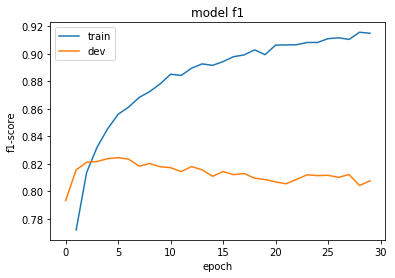

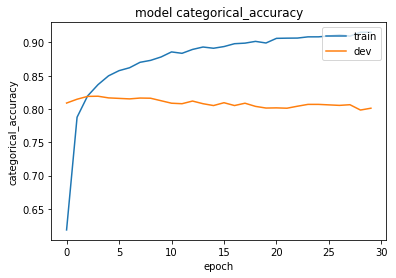

In [23]:
from app.visualization import plot_history_metrics
import matplotlib.pylab as plt

%matplotlib inline
plot_history_metrics(history_obj=model_tf_history)